#IMPORTATIONS


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math

#handling warnings
import warnings
warnings.filterwarnings("ignore")

#SIGNALS LOADING

In [15]:
data = pd.read_csv("data.csv")

In [16]:
data.head()

,x[n],y[n],n
0,35.4312,33.3735,1
1,35.1511,34.3744,2
2,34.8284,35.7514,3
3,34.4656,35.5869,4
4,34.0656,36.0826,5


In [50]:
# Defining Data Frames
df = pd.DataFrame(data[['x[n]','y[n]','n']])

In [66]:
x= np.array((data['x[n]']))
y= np.array((data['y[n]']))
n= np.array((data['n']))

## plotting the original and distorted signals

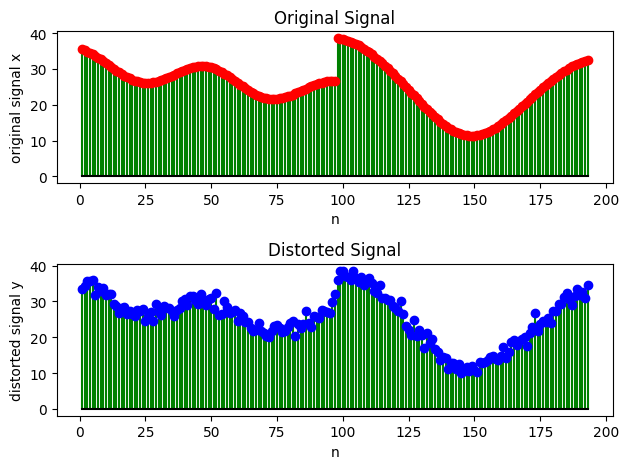

In [67]:
# First subplot for the original signal x
plt.subplot(2, 1, 1)
plt.stem(n, x, linefmt='g-', markerfmt='ro', basefmt='k-')
plt.xlabel('n')
plt.ylabel('original signal x')
plt.title('Original Signal')

# Second subplot for the distorted signal y
plt.subplot(2, 1, 2)
plt.stem(n, y, linefmt='g-', markerfmt='bo', basefmt='k-')
plt.xlabel('n')
plt.ylabel('distorted signal y')
plt.title('Distorted Signal')

plt.tight_layout()
plt.show()

#METHOD 1

First Remove Noise And Then Sharpen (Deblur).

Let The Resulting Signal Be x1[n]

## denoising

In [68]:
# Defining Function To Denoise The Signal.
def denoise(y):
  z = [(y[0]+y[0]+y[0]+y[1]+y[2])/5]         # Storing The Values At Edges.
  z.append((y[0]+y[0]+y[1]+y[2]+y[3])/5)
  # Loop To Denoise The Signal (Running For All The Readings Except Ones At Edges/Boundaries).
  for i in range(2,len(y)-2):
    sum = (y[i-2] + y[i-1] + y[i]+ y[i+1] + y[i+2])/5
    z.append(sum)
  z.append((y[-1]+y[-1]+y[-2]+y[-3]+y[-4])/5)
  z.append((y[-1]+y[-1]+y[-1]+y[-2]+y[-3])/5)     # Storing The Values At Edges.
  return z                                        # Returning Denoised Array

# (denoise_1) We Are Denoising The Signal First.
denoise_1= denoise(y)

<StemContainer object of 3 artists>

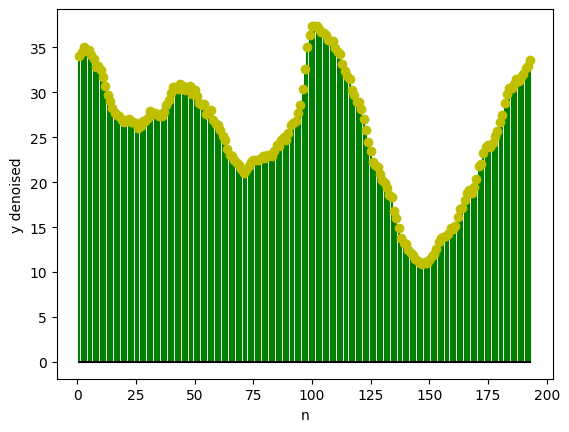

In [69]:
plt.xlabel('n')
plt.ylabel('y denoised')
plt.stem(n,denoise_1, linefmt='g-', markerfmt='yo', basefmt='k-')

##deblurring

In [70]:
pi= math.pi
e= math.e

# Defining Function For Finding Discrete-Time Fourier Transform which has two input arguments.
def dtft(y,w):
  X=0
  for n in range(len(y)):
    X+= y[n]*e**(complex(0,-w*n))   # Formula of DTFT
  return X

# Defining Function For Finding Approximation of Discrete-Time Fourier Transform.
def approx_dtft(y):
  X=[]
  for k in range(len(y)):
    X.append(dtft(y,2*pi*k/(len(y))))   # len(y) (in formula) is no. of divisions in which we are dividing w from 0-2pi
  return X

Implementing DTFT of Denoised Signal and Plotting It:

<StemContainer object of 3 artists>

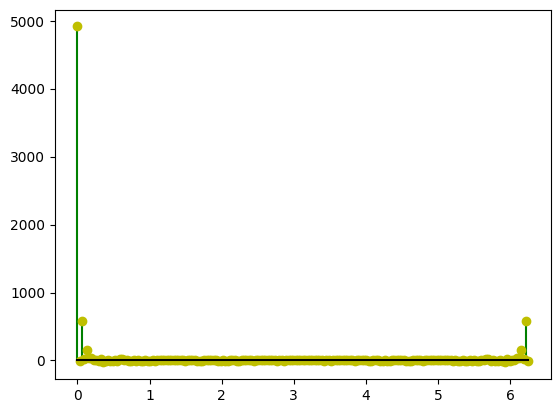

In [71]:
Yk= approx_dtft(denoise_1)
W=[]
# Taking Discrete values of frequency.
for k in range(len(y)):
  W.append(2*pi*k/(len(y)))
plt.stem(W,Yk, linefmt='g-', markerfmt='yo', basefmt='k-')

Implementing DTFT of h[n] and Plotting It:

<StemContainer object of 3 artists>

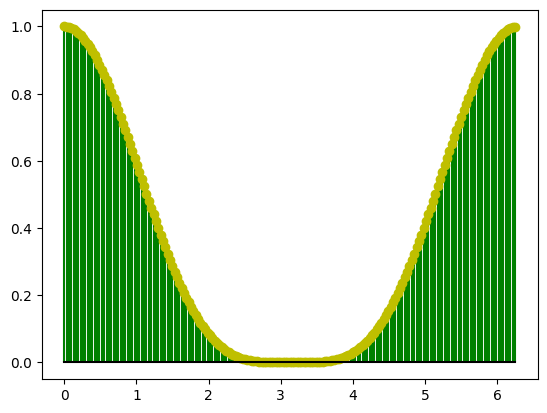

In [72]:
h=[1/16,4/16,6/16,4/16,1/16]         # Given impulse response
j=complex(0,1)
# Defining DTFT for impulse response.
def discrete_fourier_transform_for_h(sl,w):
    sum=0
    for i in range(0,len(sl),1):
      sum+=sl[i]*np.exp(-(i-2)*j*w)
    return sum

h_jw=[]
# Applying the concept of approximation of DTFT.
for i in range(len(y)):
  h_jw.append(discrete_fourier_transform_for_h(h,2*i*np.pi/len(y)))
plt.stem(W,h_jw, linefmt='g-', markerfmt='yo', basefmt='k-')

Deblurring the Denoised Signal (in frequency domain) and Plotting It:

<StemContainer object of 3 artists>

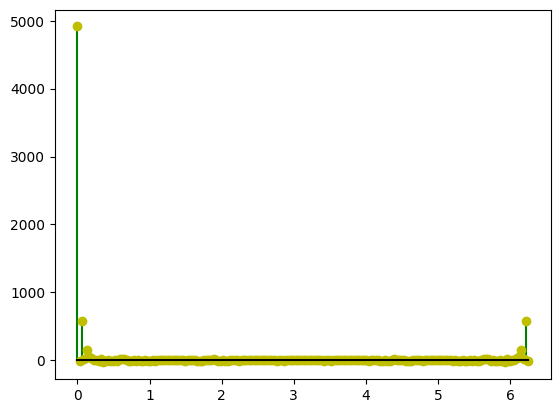

In [73]:
deblur_1w=[]
for k in range(len(y)):
  if h_jw[k]<0.35:                 # We have put an upper limit of 0.35 as the h(jw) contained some values near to 0 so when we put these values in denominator the result will tend to very large values so we can alter that values in order to get better outcome!!
    deblur_1w.append(Yk[k]/0.35)
  else:
    deblur_1w.append((Yk[k])/h_jw[k])
plt.stem(W,deblur_1w, linefmt='g-', markerfmt='yo', basefmt='k-')

Implementing Inverse DTFT to get x1[n] from x1(e^jw) and Comparing it to x[n] graphically:

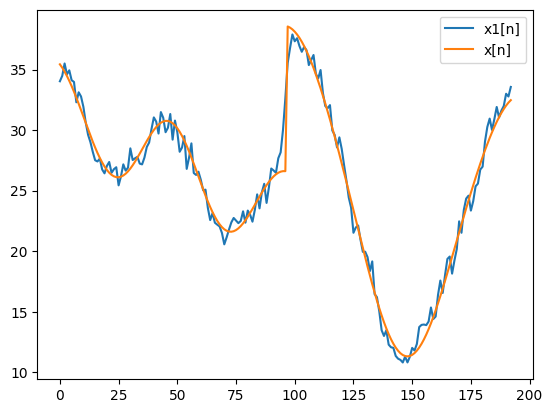

In [74]:
# Defining Function For Finding Inverse of Discrete-Time Fourier Transform.
def inverse_dtft(Yk):
  global W
  output=[]
  for n in range(len(Yk)):
    sum=0
    for r in range(len(Yk)):
      sum+= ((Yk[r]*e**complex(0,W[r]*n)))/len(y)  # Formula for calculating Inverse DTFT
    output.append(sum)
  return output

deblur_1n = inverse_dtft(deblur_1w)
plt.plot(deblur_1n, label='x1[n]')
plt.plot(x, label='x[n]')
plt.legend()

In [76]:
data['x1[n]'] = deblur_1n

In [77]:
for i in range(len(deblur_1n)):
 deblur_1n[i] = deblur_1n[i].real
data['x1[n]'] = deblur_1n

#METHOD 2

First Sharpen (Deblur) And Then Remove Noise.

Let The Resulting Signal Be x2[n].

##deblurring

<StemContainer object of 3 artists>

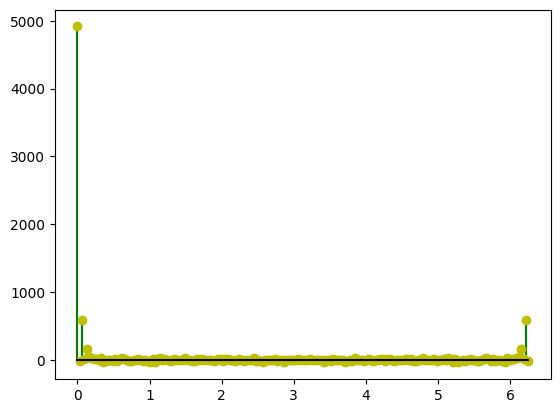

In [78]:
Yk2= approx_dtft(y)
plt.stem(W,Yk2, linefmt='g-', markerfmt='yo', basefmt='k-')

Deblurring y[n] (in frequency domain) and Plotting It:

In [79]:
Yk= approx_dtft(y)
W=[]
# Taking Discrete values of frequency.
for k in range(len(y)):
  W.append(2*pi*k/(len(y)))

deblur_2w=[]
for k in range(len(y)):
  if h_jw[k]<0.35:
    deblur_2w.append(Yk[k]/0.35)
  else:
    deblur_2w.append((Yk[k])/h_jw[k])

Taking the Inverse DTFT of the Deblurred Signal to get the signal in time domain:

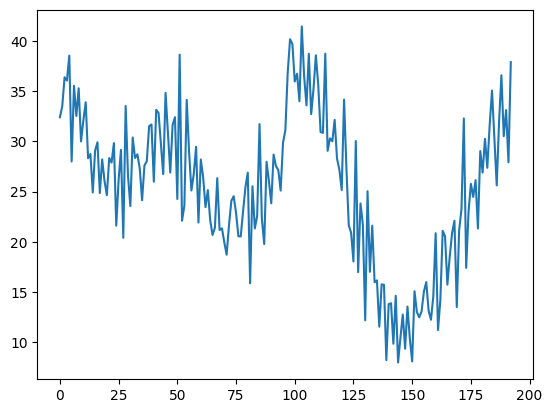

In [80]:
deblur_2n= inverse_dtft(deblur_2w)
plt.plot(deblur_2n)

##denoising

Denoising the Deblurred Signal and Comparing It with x[n] Graphically:

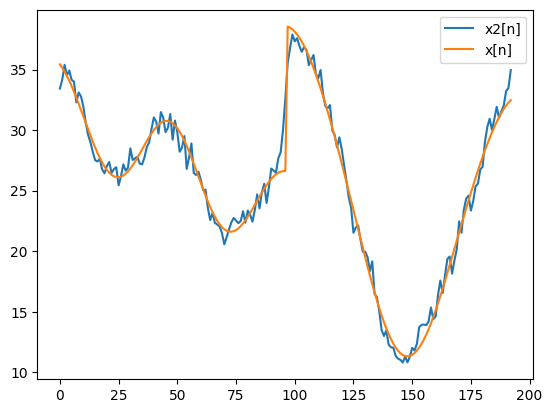

In [81]:
denoise_2= denoise(deblur_2n)

plt.plot(denoise_2, label='x2[n]')
plt.plot(x, label='x[n]')
plt.legend()


In [82]:
for i in range(len(denoise_2)):
  denoise_2[i] = denoise_2[i].real
data['x2[n]'] = denoise_2

#RESULTS

Which approach was more accurate?

Let's use the Mean Square Error (MSE) to find out.

**Method 1:**

In [83]:
mse1 = 0
for i in range(193):
  mse1 += ((deblur_1n[i] - x[i])**2) # Formula for calculating MSE

mse1 = mse1/len(y)
print(abs(mse1))

0.9267337063157453


**Method 2:**

In [84]:
mse2 = 0
for i in range(193):
  mse2 += (denoise_2[i]- x[i])**2 # Formula for calculating MSE

mse2 = mse2/len(y)
print(abs(mse2))

0.974207288579975
